In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()  # noqa
import dash_bio as dashbio
from python.cogtext.datasets.pubmed import PubMedDataLoader
from python.cogtext.similarity_matrix import get_similarity_matrix

In [3]:
# load weights, clusters and metadata (takes <20sec)

clusters = pd.read_csv('models/sbert/abstracts_clusters.csv.gz', index_col=0)
weights = np.load('models/sbert/abstracts_weights.npz')['arr_0']
clusters['weights'] = list(weights)

pubmed = PubMedDataLoader(preprocessed=False, drop_low_occurred_labels=True).load()
pubmed = pubmed.merge(clusters, on='pmid', how='left')

pubmed.dropna(subset=['cluster'], inplace=True)

## Similarity heatmaps

In [4]:
# plot label-label similarity matrix

# average-pooling: create label-embeddings by averaging doc-embeddings of each label
# label_embeddings = pubmed.groupby('label')['weights'].apply(np.mean)

# max-pooling
label_embeddings = (
  pubmed.groupby('label')['weights'].apply(lambda x: np.max(np.stack(x.values), axis=0))
)

label_embeddings = pd.DataFrame(np.stack(label_embeddings), index=label_embeddings.index)

def find_category_by_label(label, pubmed=pubmed):
  return pubmed.query('label == @label')['category'].iloc[0]

# add categories of labels
label_embeddings['category'] = label_embeddings.index.to_series().apply(find_category_by_label)
label_embeddings.set_index(['category'], append=True, inplace=True)

In [8]:
# # now generate the task-construct similarity matrix
labels_sim = get_similarity_matrix(label_embeddings, metric='cosine', pivot_by_category=False)


# # drop tasks for visualization
tasks = pubmed.query('category.str.contains("Task")')['label'].unique()
labels_sim.drop(index=tasks, columns=tasks, inplace=True)

# # heatmap plot categorized by label category, either task or construct
# g = sns.clustermap(labels_sim,
#                    figsize=(25, 25),
#                    dendrogram_ratio=0.0001, 
#                    cbar_pos=(1.0, 0.73, 0.03, 0.25),
#                    robust=True)
# plt.show()

dashbio.Clustergram(
  data=labels_sim,
  column_labels=labels_sim.columns.to_list(),
  row_labels=labels_sim.index.to_list(),
  cluster='all',
  center_values=False,
  height=800,
  width=1000,
  display_ratio=[0.001, 0.001],
  color_map='RdBu_r',
  hidden_labels=['col'],
  row_dist='euclidean',
  col_dist='euclidean',
  # standardize='col'
)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hoverinfo': 'y+name',
              'line': {'width': 0.5},
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'name': 'Col Cluster 0',
              'type': 'scatter',
              'x': array([ 94.0625   ,  94.0625   , 417.6171875, 417.6171875]),
              'xaxis': 'x2',
              'y': array([2.27890676, 4.15041739, 4.15041739, 2.62850757]),
              'yaxis': 'y2'},
             {'hoverinfo': 'y+name',
              'line': {'width': 0.5},
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'name': 'Col Cluster 1',
              'type': 'scatter',
              'x': array([ 5.,  5., 15., 15.]),
              'xaxis': 'x2',
              'y': array([0.        , 1.43569106, 1.43569106, 0.        ]),
              'yaxis': 'y2'},
             {'hoverinfo': 'y+name',
              'line': {'width': 0.5},
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'name': 'Col Cluster 2',
              'type': 'scatter',
              'x': array([10., 10., 30., 30.]),
              'xaxis': 'x2',
              'y': array([1.43569106, 1.51483874, 1.51483874, 1.44667335]),
              'yaxis': 'y2'},
             {'hoverinfo': 'y+name',
              'line': {'width': 0.5},
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'name': 'Col Cluster 3',
              'type': 'scatter',
              'x': array([20.  , 20.  , 61.25, 61.25]),
              'xaxis': 'x2',
              'y': array([1.51483874, 1.7358966 , 1.7358966 , 1.64466357]),
              'yaxis': 'y2'},
             {'hoverinfo': 'y+name',
              'line': {'width': 0.5},
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'name': 'Col Cluster 4',
              'type': 'scatter',
              'x': array([25., 25., 35., 35.]),
              'xaxis': 'x2',
              'y': array([0.        , 1.44667335, 1.44667335, 0.        ]),
              'yaxis': 'y2'},
             {'hoverinfo': 'y+name',
              'line': {'width': 0.5},
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'name': 'Col Cluster 5',
              'type': 'scatter',
              'x': array([ 40.625,  40.625, 147.5  , 147.5  ]),
              'xaxis': 'x2',
              'y': array([1.7358966 , 2.27890676, 2.27890676, 1.84445105]),
              'yaxis': 'y2'},
             {'hoverinfo': 'y+name',
              'line': {'width': 0.5},
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'name': 'Col Cluster 6',
              'type': 'scatter',
              'x': array([45., 45., 55., 55.]),
              'xaxis': 'x2',
              'y': array([0.        , 0.87872548, 0.87872548, 0.        ]),
              'yaxis': 'y2'},
             {'hoverinfo': 'y+name',
              'line': {'width': 0.5},
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'name': 'Col Cluster 7',
              'type': 'scatter',
              'x': array([50. , 50. , 72.5, 72.5]),
              'xaxis': 'x2',
              'y': array([0.87872548, 1.64466357, 1.64466357, 1.33861968]),
              'yaxis': 'y2'},
             {'hoverinfo': 'y+name',
              'line': {'width': 0.5},
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'name': 'Col Cluster 8',
              'type': 'scatter',
              'x': array([65., 65., 80., 80.]),
              'xaxis': 'x2',
              'y': array([0.        , 1.33861968, 1.33861968, 1.28173262]),
              'yaxis': 'y2'},
             {'hoverinfo': 'y+name',
              'line': {'width': 0.5},
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'name': 'Col Cluster 9',
       

## Popular Constructs

In [9]:
# plot only popular tasks and popular constructs

n_popular_labels = 40

popular_labels = (pubmed.groupby(['category','label'])['pmid']
                        .count().sort_values(ascending=False)
                        .groupby('category').head(n_popular_labels)
                        .index.get_level_values('label').to_list())

popular_label_embeddings = label_embeddings.query('label in @popular_labels')

popular_labels_sim = get_similarity_matrix(
  popular_label_embeddings,
  metric='cosine',
  pivot_by_category=False)

# # drop tasks for visualization
tasks = pubmed.query('category.str.contains("Task")')['label'].unique()
popular_labels_sim.drop(index=tasks, columns=tasks, errors='ignore', inplace=True)

# g = sns.clustermap(popular_labels_sim, robust=True,
#                    dendrogram_ratio=0.0001, 
#                    cbar_pos=(1.0, 0.73, 0.03, 0.25),
#                    cmap='viridis_r',
#                   )
# plt.show()

import dash_bio as dashbio

dashbio.Clustergram(
  data=popular_labels_sim,
  column_labels=popular_labels_sim.columns.to_list(),
  row_labels=popular_labels_sim.index.to_list(),
  center_values=False,
  cluster='all',
  height=800,
  width=900,
  display_ratio=[0.001, 0.001], 
  color_map='RdBu_r',
  # hidden_labels=['col'],
  row_dist='euclidean',
  col_dist='euclidean',
  # standardize='col'
)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hoverinfo': 'y+name',
              'line': {'width': 0.5},
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'name': 'Col Cluster 0',
              'type': 'scatter',
              'x': array([ 49.609375,  49.609375, 301.171875, 301.171875]),
              'xaxis': 'x2',
              'y': array([1.37582153, 2.28671876, 2.28671876, 1.77753943]),
              'yaxis': 'y2'},
             {'hoverinfo': 'y+name',
              'line': {'width': 0.5},
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'name': 'Col Cluster 1',
              'type': 'scatter',
              'x': array([ 5.,  5., 15., 15.]),
              'xaxis': 'x2',
              'y': array([0.        , 0.84057251, 0.84057251, 0.        ]),
              'yaxis': 'y2'},
             {'hoverinfo': 'y+name',
              'line': {'width': 0.5},
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'name': 'Col Cluster 2',
              'type': 'scatter',
              'x': array([10.     , 10.     , 89.21875, 89.21875]),
              'xaxis': 'x2',
              'y': array([0.84057251, 1.37582153, 1.37582153, 1.12686495]),
              'yaxis': 'y2'},
             {'hoverinfo': 'y+name',
              'line': {'width': 0.5},
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'name': 'Col Cluster 3',
              'type': 'scatter',
              'x': array([25., 25., 35., 35.]),
              'xaxis': 'x2',
              'y': array([0.        , 0.46127565, 0.46127565, 0.        ]),
              'yaxis': 'y2'},
             {'hoverinfo': 'y+name',
              'line': {'width': 0.5},
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'name': 'Col Cluster 4',
              'type': 'scatter',
              'x': array([30.  , 30.  , 53.75, 53.75]),
              'xaxis': 'x2',
              'y': array([0.46127565, 0.7508143 , 0.7508143 , 0.50998845]),
              'yaxis': 'y2'},
             {'hoverinfo': 'y+name',
              'line': {'width': 0.5},
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'name': 'Col Cluster 5',
              'type': 'scatter',
              'x': array([ 41.875 ,  41.875 , 136.5625, 136.5625]),
              'xaxis': 'x2',
              'y': array([0.7508143 , 1.12686495, 1.12686495, 1.07511062]),
              'yaxis': 'y2'},
             {'hoverinfo': 'y+name',
              'line': {'width': 0.5},
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'name': 'Col Cluster 6',
              'type': 'scatter',
              'x': array([45. , 45. , 62.5, 62.5]),
              'xaxis': 'x2',
              'y': array([0.        , 0.50998845, 0.50998845, 0.33066428]),
              'yaxis': 'y2'},
             {'hoverinfo': 'y+name',
              'line': {'width': 0.5},
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'name': 'Col Cluster 7',
              'type': 'scatter',
              'x': array([55., 55., 70., 70.]),
              'xaxis': 'x2',
              'y': array([0.        , 0.33066428, 0.33066428, 0.28470683]),
              'yaxis': 'y2'},
             {'hoverinfo': 'y+name',
              'line': {'width': 0.5},
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'name': 'Col Cluster 8',
              'type': 'scatter',
              'x': array([65., 65., 75., 75.]),
              'xaxis': 'x2',
              'y': array([0.        , 0.28470683, 0.28470683, 0.        ]),
              'yaxis': 'y2'},
             {'hoverinfo': 'y+name',
              'line': {'width': 0.5},
              'marker': {'color': 'rgb(0,116,217)'},
              'mode': 'lines',
              'name': 'Col

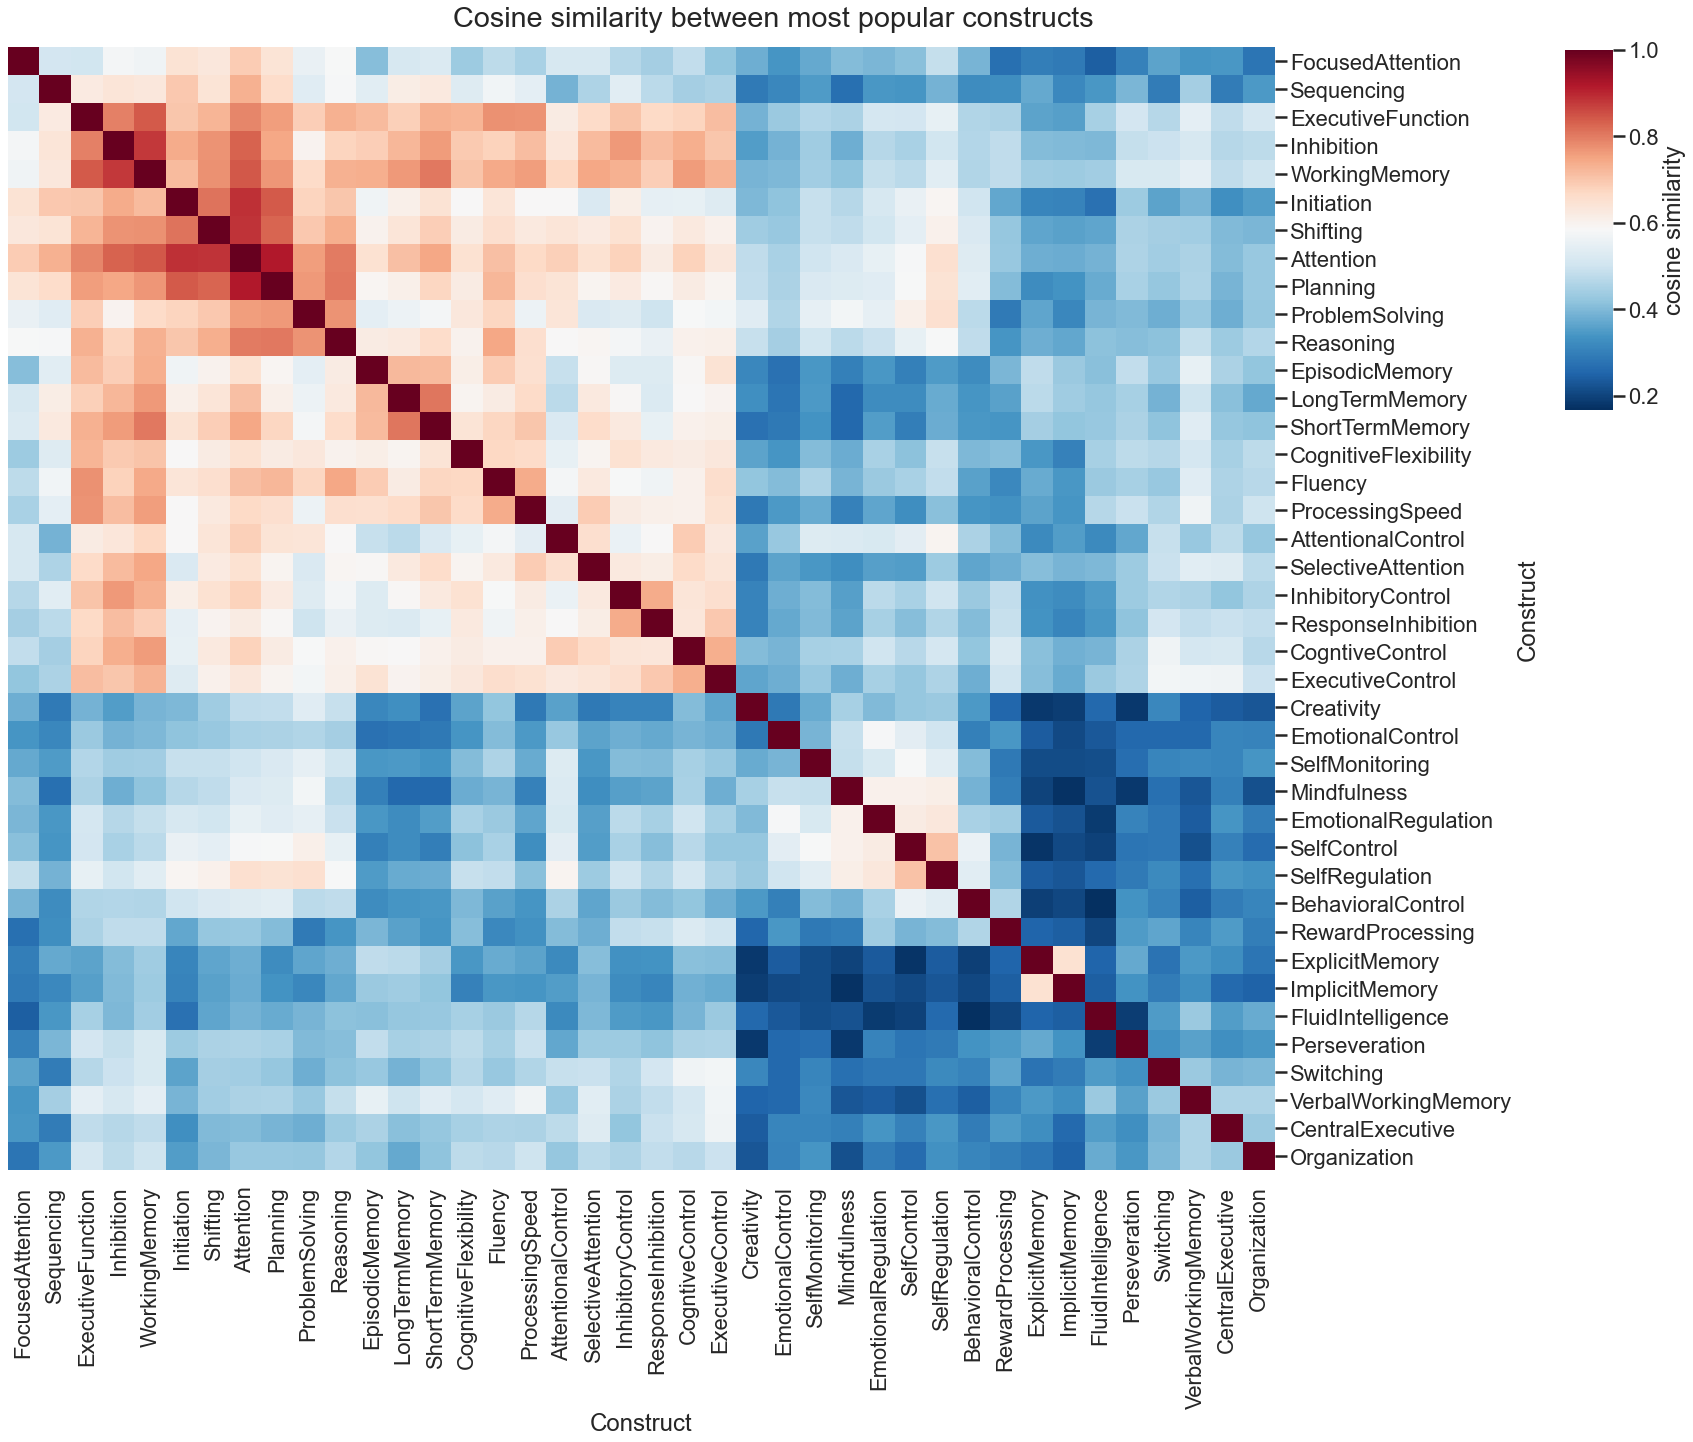

In [10]:
# plot kl-divergence between construct labels, ignoring the task labels.

X = popular_label_embeddings.query('category.str.contains("Construct")')
X_sim = get_similarity_matrix(X, metric='cosine', pivot_by_category=False)

sns.set('poster')
g = sns.clustermap(X_sim,figsize=(22,20), dendrogram_ratio=0.0001,
               cbar_pos=(1.0, 0.73, 0.03, 0.25),
               cmap='RdBu_r', cbar_kws={'label': 'cosine similarity'})
g.ax_heatmap.set(xlabel='Construct', ylabel='Construct')
plt.suptitle('Cosine similarity between most popular constructs',y=1.01)
plt.show()

In [11]:
# create a graph

import stellargraph as sg
from stellargraph.data import UniformRandomMetaPathWalk

embeddings = popular_label_embeddings

sim = get_similarity_matrix(embeddings, metric='kl', pivot_by_category=False)
sim.columns.name = 'source'
sim.index.name = 'target'

# keep = np.triu(np.ones(sim.shape)).astype('bool').reshape(sim.size)
adj = sim.stack().to_frame().reset_index()
adj = adj.query('target != source').rename(columns={0:'weight'})

edges = adj.query('weight > weight.mean()')

constructs = label_embeddings.query('category == "CognitiveConstruct"').reset_index(1,drop=True)
tasks = label_embeddings.query('category == "CognitiveTask"').reset_index(1,drop=True)

G = sg.StellarGraph(
  nodes = {'task': tasks,
           'construct': constructs},
  edges=edges)
print(G.info())

2022-01-21 14:38:06.565880: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


StellarGraph: Undirected multigraph
 Nodes: 168, Edges: 3104

 Node types:
  task: [96]
    Features: float32 vector, length 629
    Edge types: task-default->construct, task-default->task
  construct: [72]
    Features: float32 vector, length 629
    Edge types: construct-default->construct, construct-default->task

 Edge types:
    construct-default->task: [1586]
        Weights: range=[2.83851, 5.27442], mean=3.42609, std=0.466702
        Features: none
    task-default->task: [1212]
        Weights: range=[2.84, 5.49335], mean=3.84797, std=0.618801
        Features: none
    construct-default->construct: [306]
        Weights: range=[2.83997, 4.1059], mean=3.22251, std=0.298329
        Features: none


In [18]:
# metapath2vec

from gensim.models import Word2Vec

# metapath schemas as a list of lists of node types.
metapaths = [
    ['task', 'construct', 'task'],
    ['construct', 'task', 'construct'],
    # ['construct', 'task', 'task', 'construct'],
    # ['task', 'construct', 'task', 'construct', 'task'],
    # ['task', 'construct', 'construct', 'task'],
]

walks = UniformRandomMetaPathWalk(G).run(
    nodes=list(G.nodes()),  # root nodes
    length=3,  # maximum length of a random walk
    n=10000,  # number of random walks per root node
    metapaths=metapaths,  # the metapaths
)

print(f'Number of random walks: {len(walks)}')
# print('Random walks starting from the "RewardProcessing" node:',
#       [' -> '.join(w) for w in walks if w[0] == 'RewardProcessing'])

model = Word2Vec(walks, vector_size=128, min_count=0, window=3, sg=1, workers=1, epochs=10000)

model.save('models/sbert/abstracts_metapath2vec.pkl')

Number of random walks: 1680000


In [17]:
# query the joint graph

model.wv.most_similar(
  positive=['RewardProcessing'],
  # negative=['TMT_-_Trail_Making_Task']
  topn=10)

[('SelfControl', 0.4987911283969879),
 ('SelfRegulation', 0.45801424980163574),
 ('BehavioralControl', 0.4532740116119385),
 ('Creativity', 0.3699090778827667),
 ('EmotionalRegulation', 0.366973876953125),
 ('Verbal_fluency_task', 0.3472782373428345),
 ('Mindfulness', 0.33503761887550354),
 ('ImplicitMemory', 0.3139455020427704),
 ('EmotionalControl', 0.28757497668266296),
 ('Initiation', 0.28025752305984497)]

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


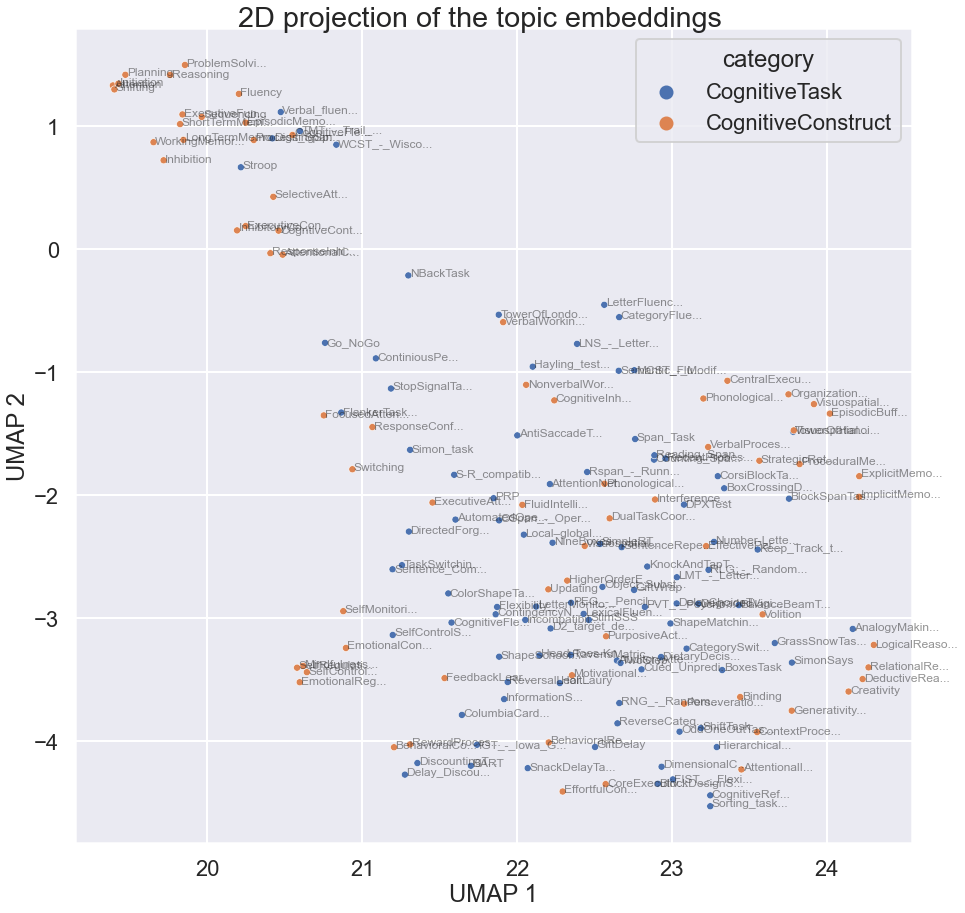

In [10]:
import plotly.express as px

# projections = PCA(n_components=2, random_state=0).fit_transform(label_embeddings)
projections_3d = UMAP(n_components=3, random_state=0).fit_transform(popular_label_embeddings)
projections_2d = UMAP(n_components=2, random_state=0).fit_transform(label_embeddings)

projections_3d = pd.DataFrame(projections_3d, index=popular_label_embeddings.index).reset_index()
projections_2d = pd.DataFrame(projections_2d, index=label_embeddings.index).reset_index()

fig = px.scatter_3d(projections_3d,
                    x=0, y=1, z=2,
                    color='category', hover_name='label',
                    title='Popular labels in the topic space',
                    color_discrete_sequence=['red','blue'],
                    width=600, height=600,)
fig.show()


fig, ax = plt.subplots(1,1, figsize=(15,15))
sns.scatterplot(data=projections_2d, x=0, y=1, ax=ax, s=50, hue='category')

for (i,lbl, _,x, y) in projections_2d.itertuples():
  lbl = f'{lbl[:12]}...' if len(lbl)>10 else lbl
  ax.text(x+0.01, y-np.random.random()*.02, f'{lbl}', alpha=0.5, fontsize=12)

ax.set(xlabel='UMAP 1', ylabel='UMAP 2')
plt.suptitle('2D projection of the topic embeddings',y=.9)
plt.show()

In [11]:
%reload_ext watermark
%watermark
%watermark -iv -p umap,pytorch,scikit-learn,python.cogtext

Last updated: 2021-12-08T13:44:47.140563+01:00

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.28.0

Compiler    : Clang 11.1.0 
OS          : Darwin
Release     : 21.1.0
Machine     : x86_64
Processor   : i386
CPU cores   : 12
Architecture: 64bit

umap          : 0.5.2
pytorch       : not installed
scikit-learn  : 0.0
python.cogtext: 0.1.2021120813

matplotlib  : 3.4.3
dash_bio    : 0.8.0
stellargraph: 1.2.1
sys         : 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:23:19) 
[Clang 11.1.0 ]
seaborn     : 0.11.2
plotly      : 5.3.1
numpy       : 1.20.3
pandas      : 1.3.4

